# QUESTION 1

In [ ]:
import numpy as np  #importing libraries
import pandas as pd
def Data_set_log(n,m,theta):

    x=2 * np.random.random_sample(size=(n,m-1)) - 1
    x1=np.ones((n,1)) #first column of ones
    h=np.concatenate((x1,x),axis=1) #concat the x matrix with x1 column(to get n*m matrix)
    beta=2 * np.random.random_sample((m,1)) - 1  #initaialising beta
    tup=(1/(1+np.exp(-(np.matmul(h,beta)))))
    y=[]
    ber=np.random.binomial(1,theta,size=(n,1))  #noise (bernoulli)
    for i in range(len(tup)):
      if (tup[i]>0.5):   #condition to make y 0 or 1
        y=np.append(y,[1])
        if(ber[i]==1):
          y[i]=0
      else:
       y=np.append(y,[0])
       if(ber[i]==1):
          y[i]=1

    mat=np.concatenate((h,y.reshape(n,1)),axis=1) #concat the y column with the h matrix
    matrix=pd.DataFrame( #creating data using pandas
        data=mat,columns= [f"x{i+1}" for i in range(m)]+["y"]
    )
    return matrix,h,theta,y,beta


m=5
n=7
theta=0.7
matrix,h,theta,y,beta= Data_set_log(n,m,theta)
matrix, beta


(    x1        x2        x3        x4        x5    y
 0  1.0 -0.830110 -0.062624  0.667137  0.580274  1.0
 1  1.0 -0.725644 -0.398105 -0.788340  0.865545  1.0
 2  1.0 -0.430306  0.227284  0.889601 -0.632472  0.0
 3  1.0  0.271251 -0.179991  0.396928  0.072129  1.0
 4  1.0 -0.394970  0.273150  0.794855  0.497589  0.0
 5  1.0 -0.048261  0.708946 -0.562647 -0.657897  0.0
 6  1.0 -0.097077  0.659143  0.291217  0.707104  0.0,)

# QUESTION 2

In [ ]:
def logistic_regression(h,y,ler,iter,threshold):

  beta_pred=2*np.random.rand(m,1)-1 #predicted value of beta
  y_new = y.reshape(len(y),1) #tranpose matrix
  for i in range(iter):
    y_pred=(1/(1+np.exp(-(np.matmul(h,beta_pred))))) #predicted value of y
    cost = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred)) #cost
    beta_pred  = beta_pred - (2/n)*np.matmul(h.T, (y_pred - y.reshape(len(y),1))) #updating value of predicted beta

    y_pred_p=(1/(1+np.exp(-(np.matmul(h,beta_pred))))) #next value of y_pred and cost
    costp = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
    if(abs(costp-cost)<threshold):  #threshold condition
      break

  return (y_pred,beta_pred,cost)


ler=0.001
iter=10
threshold=0.003
y_pred,beta_pred,cost=logistic_regression(h,y,ler,iter,threshold)
beta_pred,cost

(array([[-0.54233817],
        [-0.56564608],
        [ 0.51325994],
        [ 0.06688088],
        [-0.44637096]]),
 1.8721120778888285)

# QUES 3(PART A,CHANGING N)
The number of independent variables in logistic regression can significantly influence model accuracy. Including relevant variables enhances the model's ability to capture meaningful relationships between features and the target variable, leading to improved accuracy. However, an excessive number of variables may result in overfitting, where the model fits the training data too closely but fails to generalize to new data. Multicollinearity, or high correlation among variables, can hinder accurate coefficient estimation. Adequate sample size is crucial for stable estimates, and high dimensionality poses challenges due to the curse of dimensionality. Striking a balance in model complexity is essential, and techniques such as feature selection and regularization can help manage the impact of a large number of variables on logistic regression accuracy.

[0.37948462 0.43596206 0.30261256 0.17282855 0.27304638 0.31359428
 0.28646297 0.29105285 0.17710715 0.2978379  0.37948462 0.30261256
 0.27042475 0.35397869 0.30760425 0.29476847 0.32338879 0.33640248
 0.33609342 0.34730562 0.37948462 0.30378083 0.34519475 0.3446015
 0.35337713 0.37049958 0.37775067 0.33425481 0.35032005 0.35752118
 0.35667643 0.34113054 0.30499989 0.34050724 0.32668209 0.34653945
 0.33327581 0.33319457 0.2965116  0.33304384 0.35622921 0.35562778
 0.35505337 0.31106004 0.31678252 0.33786967 0.36318186 0.34753779]


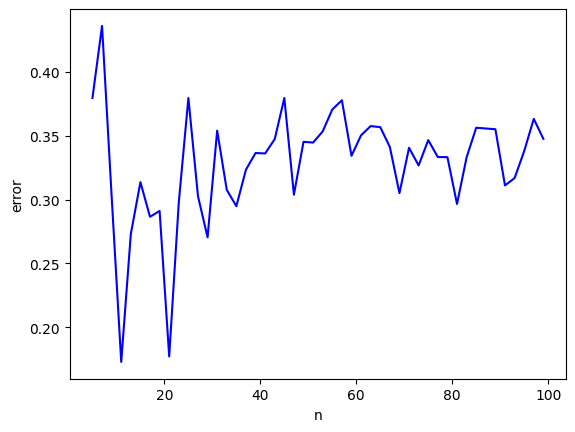

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def get_current_error(y_pred,y): #to calculate mean square error
   return np.square(np.subtract(y,y_pred)).mean()

error=[]

for j in range(5,100,2):

  matrix,h,theta,y,beta=Data_set_log(j,5,0.5)
  error=np.append(error,get_current_error(y_pred,y)) #append errors for different n

print(error)

plot = plt.figure('dependence') #plot the error vs n graph
plt.plot(range(5,100,2),error, color='b')
plt.xlabel('n')
plt.ylabel('error')
plot.show()

# PART B(CHANGING THETA)
When θ is close to 0 or 1, it means that the probability of success or failure is highly certain.
If the true θ aligns with the predicted probabilities, the model may have high accuracy. However, if θ is misestimated, accuracy could be compromised.
The accuracy is generally maximized when the estimated
θ closely approximates the true underlying probability of the event.
The logistic regression model aims to estimate the optimal values for the coefficients, including θ, through the training process.

[0.29476847 0.29476847 0.22417168 0.50655885 0.29476847 0.29476847
 0.29476847 0.29476847 0.43596206 0.15357488 0.36536526]


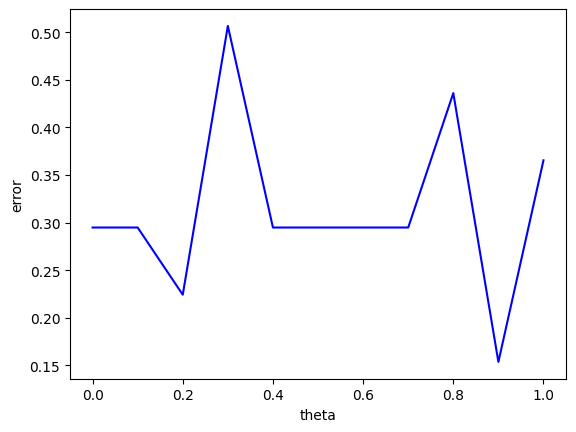

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def get_current_error(y_pred,y): #to find mean square error
  return np.square(np.subtract(y,y_pred)).mean()

error=[]
i=0.0
while(i<1.0):
  matrix,h,theta,y,beta=Data_set_log(7,5,i)
  error=np.append(error,get_current_error(y_pred,y)) #append the values of errors for different values of theta
  i=i+0.1

print(error)

value=np.arange(0.0,1.1,0.1) #plot error vs theta graph
plot = plt.figure('dependence')
plt.plot(value,error, color='b')
plt.xlabel('theta')
plt.ylabel('error')
plot.show()

# QUESTION 4

Here the differnece in the cost is not much when regularisation is aaplied

L1 Regularization (Lasso):

Higher λ leads to more aggressive regularization.
Can shrink some coefficients exactly to zero, performing feature selection.

L2 Regularization (Ridge):

Higher λ leads to more significant regularization.
Encourages the model to distribute importance more evenly among features.

The choice of the regularization constant (λ) influences the strength of regularization and the sparsity of the coefficients (L1) or the size of the coefficients (L2)




In [ ]:
def regression(h,y,ler,iter,threshold,lambd,r):

  beta_pred=2*np.random.rand(m,1)-1 #predicted vaue of beta
  print("enter 1 for L1,enter 0 for L2")
  y_new = y.reshape(len(y),1) #transpose y
  for i in range(iter):
    y_pred=(1/(1+np.exp(-(np.matmul(h,beta_pred))))) #predicted value of y

    if (r==1): #condition for applying L1
      cost = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))+lambd*np.sum(abs(beta_pred)) #add L1 parameter to cost
      beta_pred  = beta_pred - (2/n)*np.matmul(h.T, (y_pred - y.reshape(len(y),1)))
      y_pred_p=(1/(1+np.exp(-(np.matmul(h,beta_pred)))))
      costp = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))+lambd*np.sum(abs(beta_pred))


    else: #condition for applying L2

      cost = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))+lambd*np.sum((beta_pred)**2) #add L2 parameter to cost
      beta_pred  = beta_pred - (2/n)*np.matmul(h.T, (y_pred - y.reshape(len(y),1)))
      y_pred_p=(1/(1+np.exp(-(np.matmul(h,beta_pred)))))
      costp = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))+lambd*np.sum((beta_pred)**2)

    if(abs(costp-cost)<threshold): #thershold condition
      break

  return (y_pred,beta_pred,cost)


ler=0.001
iter=10
threshold=0.0003
lambd=0.2
r=1
y_pred,beta_pred,cost=regression(h,y,ler,iter,threshold,lambd,r)
beta_pred,cost

enter 1 for L1,enter 0 for L2


(array([[-0.42845457],
        [-0.6044911 ],
        [-2.00037616],
        [-0.38988259],
        [ 1.21128547]]),
 1.5765253725418695)

# QUESTION 5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class compilation: #creating class

  def Data_set(self,n,s,m):

    x=np.random.rand(n,m-1)
    x1=np.ones((n,1))
    h=np.concatenate((x1,x),axis=1)
    beta=np.random.rand(m,1)
    y=np.matmul(h,beta)+np.random.normal(0,s,size=(n,1))
    mat=np.concatenate((h,y),axis=1)
    matrix=pd.DataFrame(
        data=mat,columns=  [f"x{i+1}" for i in range(m)]+["y"])


    return matrix,h,y,beta






  def linear_regression(self,h,y,ler,iter,threshold):

   beta_pred=np.random.rand(m,1)

   for i in range(iter):
    y_pred=np.matmul(h,beta_pred)
    cost = (1 / n) * (np.sum(y_pred - y)**2)
    beta_pred  = beta_pred - (ler * ((1/n)*np.matmul(h.T, y_pred - y)))
    y_pred_p=np.matmul(h,beta_pred)
    costp = (1 /n) * (np.sum(y_pred_p - y)**2)

    if(abs(costp-cost)<threshold):
      break

   return (y_pred,beta_pred,cost)





  def Data_set_log(self,n,m,theta):

    x=2 * np.random.random_sample(size=(n,m-1)) - 1
    x1=np.ones((n,1))
    h=np.concatenate((x1,x),axis=1)
    beta=2 * np.random.random_sample((m,1)) - 1
    tup=(1/(1+np.exp(-(np.matmul(h,beta)))))
    y=[]
    ber=np.random.binomial(1,theta,size=(n,1))
    for i in range(len(tup)):
      if (tup[i]>0.5):
        y=np.append(y,[1])
        if(ber[i]==1):
          y[i]=0
      else:
       y=np.append(y,[0])
       if(ber[i]==1):
          y[i]=1

    mat=np.concatenate((h,y.reshape(n,1)),axis=1)
    matrix=pd.DataFrame(
        data=mat,columns= [f"x{i+1}" for i in range(m)]+["y"]
    )
    return matrix,h,theta,y,beta






  def logistic_regression(self,h,y,ler,iter,threshold):
    beta_pred=2*np.random.rand(m,1)-1
    y_new = y.reshape(len(y),1)
    for i in range(iter):
      y_pred=(1/(1+np.exp(-(np.matmul(h,beta_pred)))))

      cost = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
      beta_pred  = beta_pred - (2/n)*np.matmul(h.T, (y_pred - y.reshape(len(y),1)))
      y_pred_p=(1/(1+np.exp(-(np.matmul(h,beta_pred)))))
      costp = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
      if(abs(costp-cost)<threshold):
       break

    return (y_pred,beta_pred,cost)





reg= compilation() #object creation
reg.linear_regression(h,y,0.01,100,0.003)



(array([[-0.00363814,  0.99843103, -0.00363814, ..., -0.00363814,
          0.99843103, -0.00363814],
        [ 0.00288827,  1.00012362,  0.00288827, ...,  0.00288827,
          1.00012362,  0.00288827],
        [-0.002017  ,  0.99987958, -0.002017  , ..., -0.002017  ,
          0.99987958, -0.002017  ],
        ...,
        [ 0.00421274,  1.00281285,  0.00421274, ...,  0.00421274,
          1.00281285,  0.00421274],
        [-0.0012004 ,  0.99777094, -0.0012004 , ..., -0.0012004 ,
          0.99777094, -0.0012004 ],
        [ 0.00127204,  1.00119313,  0.00127204, ...,  0.00127204,
          1.00119313,  0.00127204]]),
 array([[0.00117562, 1.00052102, 0.00117562, 1.00052102, 1.00052102,
         0.00117562, 0.00117562, 0.00117562, 1.00052102, 1.00052102,
         1.00052102, 1.00052102, 0.00117562, 0.00117562, 0.00117562,
         1.00052102, 0.00117562, 1.00052102, 0.00117562, 0.00117562,
         0.00117562, 0.00117562, 1.00052102, 1.00052102, 1.00052102,
         0.00117562, 0.00117